<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/TecMty_S8_A7_Regresion_lineal_polinomial_A01097897.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [219]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import metrics
from sklearn.metrics import r2_score
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [220]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

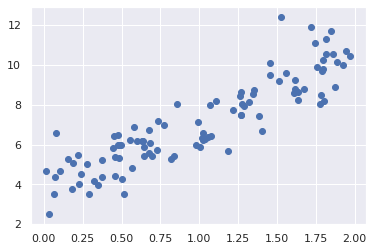

In [221]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [222]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [223]:
linear_reg = LinearRegression(fit_intercept = True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [224]:
y_hat = pd.DataFrame(linear_reg.predict(X))

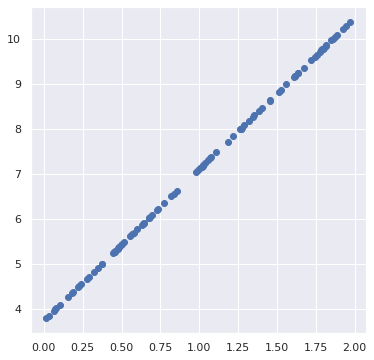

In [225]:
sns.set(rc={'figure.figsize':(6,6)})
plt.scatter(X, y_hat);

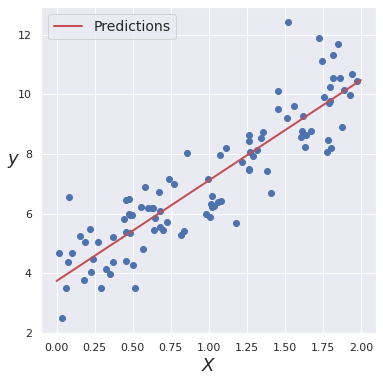

In [226]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [227]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [228]:
X_new.shape

(2, 1)

In [229]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [230]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [231]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

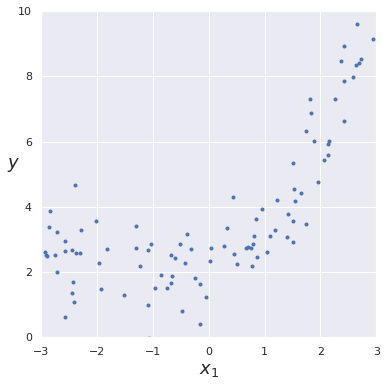

In [232]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [233]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [234]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [235]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [236]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [237]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [238]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

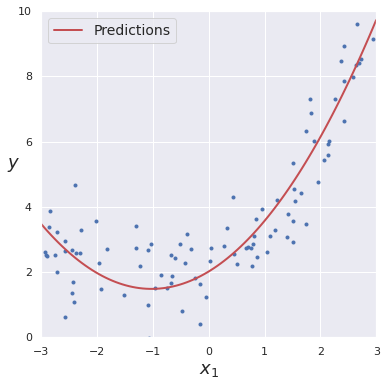

In [239]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [328]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

MAE = {}
R2 = {}

In [329]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [330]:
len(X)

1000

In [331]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

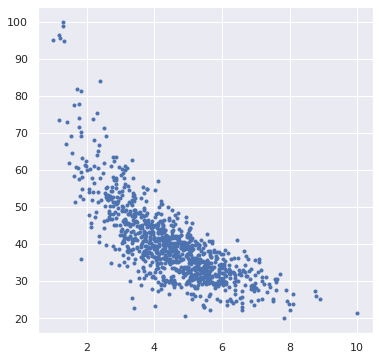

In [332]:
plt.plot(X,y,'b.')

In [333]:
#Dividimos los datos 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

Coeficiente de la formula: [-5.97912772]
Intercept de la fórmula: 66.79997932683362
Fórmula: y = 66.799979 -5.979128 X
Error medio Absoluto (MAE): 5.033403667160277
Root Mean Squared Error: 7.067709647692056
r2_score 0.595798333672179


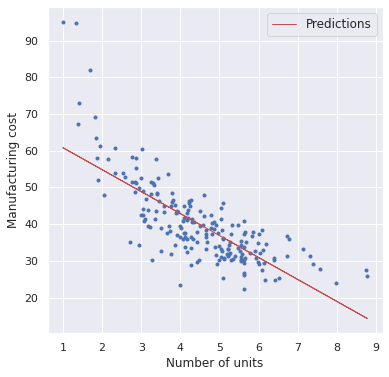

In [361]:
#lineal
lrm = LinearRegression()
lrm.fit(X_train, y_train)

y_pred = lrm.predict(X_test)

print('Coeficiente de la formula:', lrm.coef_)
print('Intercept de la fórmula:', lrm.intercept_)
print("Fórmula: y = %f %f X" % (lrm.intercept_, lrm.coef_))
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2_score(y_test, y_pred))

MAE['Lineal'] = metrics.mean_absolute_error(y_test, y_pred)
R2['Lineal'] = r2_score(y_test, y_pred)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_pred, "r-", linewidth = 1, label = "Predictions")
plt.xlabel("Number of units", fontsize = 12)
plt.ylabel("Manufacturing cost", fontsize = 12)
plt.legend(loc="upper right", fontsize = 12)
#plt.axis([-3, 3, 0, 10]);

Coeficientes de la formula: [-31.83069901   4.58905775  -0.23734936]
Intercept de la fórmula: 109.50904482461846
Fórmula: y = 109.509045 -31.830699 X + 4.589058 X^2 -0.237349 X^3
Error medio Absoluto (MAE): 4.339059416327442
Root Mean Squared Error: 5.637445640824418
r2_score 0.7428388053898056


109.50904482461846

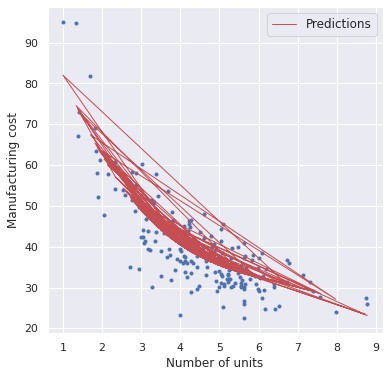

In [362]:
#polinomial
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lrpm = LinearRegression()
lrpm.fit(X_train_poly, y_train)

y_poly_pred = lrpm.predict(X_test_poly)

print('Coeficientes de la formula:', lrpm.coef_)
print('Intercept de la fórmula:', lrpm.intercept_)

print("Fórmula: y = %f %f X + %f X^2 %f X^3" % (lrpm.intercept_, lrpm.coef_[0], lrpm.coef_[1], lrpm.coef_[2]))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_poly_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_poly_pred)))
print('r2_score', r2_score(y_test, y_poly_pred))

MAE['Polinomial'] = metrics.mean_absolute_error(y_test, y_poly_pred)
R2['Polinomial'] = r2_score(y_test, y_poly_pred)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_poly_pred, "r-", linewidth = 1, label = "Predictions")
plt.xlabel("Number of units", fontsize = 12)
plt.ylabel("Manufacturing cost", fontsize = 12)
plt.legend(loc="upper right", fontsize = 12)
#plt.axis([-3, 3, 0, 10]);

lrpm.coef_
lrpm.intercept_


Coeficientes de la formula: [-31.83069901   4.58905775  -0.23734936]
Intercept de la fórmula: 109.50904482461846
Álpha:  0.02
Fórmula: y = 109.509045 -0.636614 X + 0.091781 X^2 -0.004747 X^3
Error medio Absoluto (MAE): 4.338732739362826
Root Mean Squared Error: 5.638400837082249
r2_score 0.7427516523645881


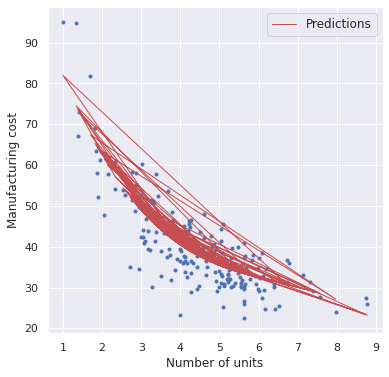

In [363]:
#Ridge
poly_features = PolynomialFeatures(degree = 3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

RidgeModel = Ridge(alpha = .02)
RidgeModel.fit(X_train_poly, y_train)

y_ridge_pred = RidgeModel.predict(X_test_poly)
print('Coeficientes de la formula:', lrpm.coef_)
print('Intercept de la fórmula:', lrpm.intercept_)
print('Álpha: ', RidgeModel.alpha)
print("Fórmula: y = %f %f X + %f X^2 %f X^3" % (lrpm.intercept_, lrpm.coef_[0] * RidgeModel.alpha, lrpm.coef_[1] * RidgeModel.alpha, lrpm.coef_[2] * RidgeModel.alpha))

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_ridge_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ridge_pred)))
print('r2_score',r2_score(y_test, y_ridge_pred))


MAE['Ridge'] = metrics.mean_absolute_error(y_test, y_ridge_pred)
R2['Ridge'] = r2_score(y_test, y_ridge_pred)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_ridge_pred, "r-", linewidth = 1, label = "Predictions")
plt.xlabel("Number of units", fontsize = 12)
plt.ylabel("Manufacturing cost", fontsize = 12)
plt.legend(loc="upper right", fontsize = 12)
#plt.axis([-3, 3, 0, 10]);

Error medio Absoluto (MAE): 4.654760690022674
Root Mean Squared Error: 6.690272280416553
r2_score 0.6378168128075252


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.133e+03, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


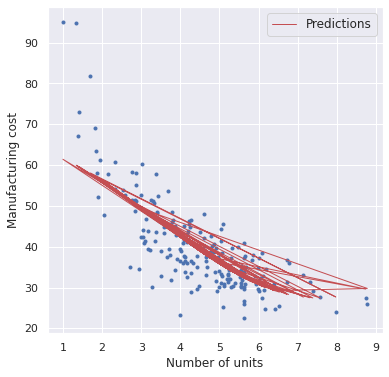

In [364]:
#Lasso
poly_features = PolynomialFeatures(degree = 4, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

LassoModel = Lasso(alpha = 1)
LassoModel.fit(X_train_poly, y_train)

y_lasso_pred = LassoModel.predict(X_test_poly)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_lasso_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_lasso_pred)))
print('r2_score',r2_score(y_test, y_lasso_pred))

MAE['Lasso'] = metrics.mean_absolute_error(y_test, y_lasso_pred)
R2['Lasso'] = r2_score(y_test, y_lasso_pred)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_lasso_pred, "r-", linewidth = 1, label = "Predictions")
plt.xlabel("Number of units", fontsize = 12)
plt.ylabel("Manufacturing cost", fontsize = 12)
plt.legend(loc="upper right", fontsize = 12)
#plt.axis([-3, 3, 0, 10]);

In [365]:
MAE

{'Lineal': 5.033403667160277,
 'Polinomial': 4.339059416327442,
 'Ridge': 4.338732739362826,
 'Lasso': 4.654760690022674}

In [366]:
R2

{'Lineal': 0.595798333672179,
 'Polinomial': 0.7428388053898056,
 'Ridge': 0.7427516523645881,
 'Lasso': 0.6378168128075252}

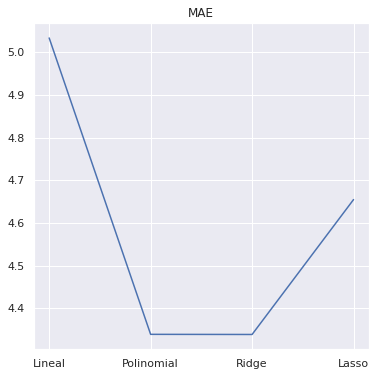

In [367]:
myList = MAE.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("MAE", fontsize = 12)
plt.show()

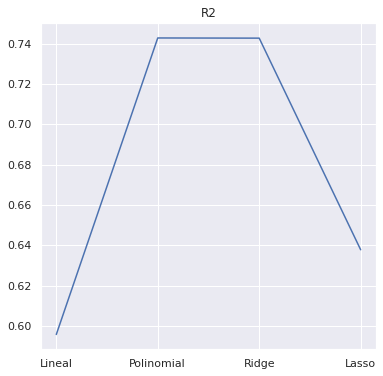

In [368]:
myList = R2.items()
x, y = zip(*myList) 

plt.plot(x, y)
plt.title("R2", fontsize = 12)
plt.show()

Decidí usar porcentajes de 80-20, pues esa distribución me permitió obtener un mejor score sin caer en el sobreentrenamiento, pero me dio suficientes datos de training para evitar el sub entrenamiento. Se puede observar que el comportamiento es polinomial, por lo que, en este caso, el lineal no explica para nada la variable dependiente, mientras que Lasso, al eliminar variables tampoco ayuda en el modelo polinomial, por lo que vemos que acertaron de manera muy baja. Por otro lado, el modelo polinomial y el polinomial con ridge, obtuvieron mejores resultados. 

En todo caso, considero que los resultados generales son más bien malos, lo que nos indica que simplemente el número de unidades no determina por si solo el costo de manofactura. Puede haber otras variables que podríamos tomar en cuenta

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí